In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('fruits.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [50]:
df.isna().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [51]:
df.columns

Index(['Weight', 'Size', 'Class'], dtype='object')

In [52]:
df.shape

(40, 3)

In [53]:
df.ndim

2

In [54]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [55]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [56]:
# Applying the lable encoding to the Class column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [57]:
df.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


# Orange has been converted into 1 and apple has been converted into 0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [59]:
df.corr()

,Weight,Size,Class
Weight,1.000000,0.765027,-0.849528
Size,0.765027,1.000000,-0.900641
Class,-0.849528,-0.900641,1.000000


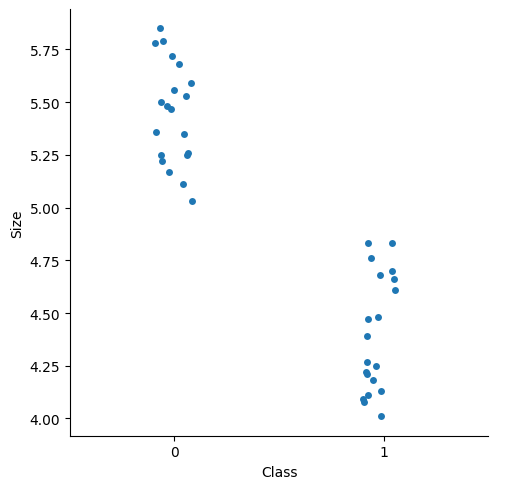

In [60]:
sns.catplot(x = 'Class', y = 'Size', data = df)
plt.show()

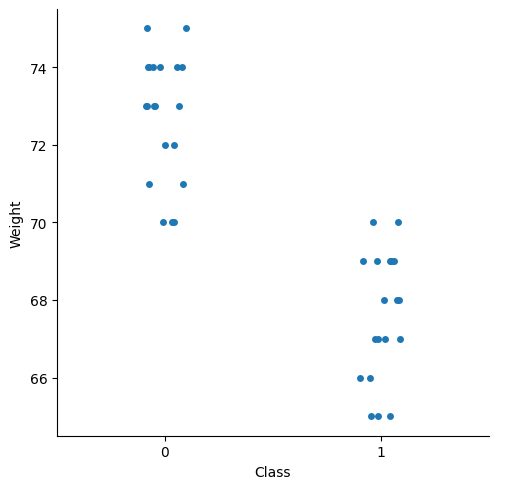

In [61]:
sns.catplot(x = 'Class', y = 'Weight', data = df)
plt.show()

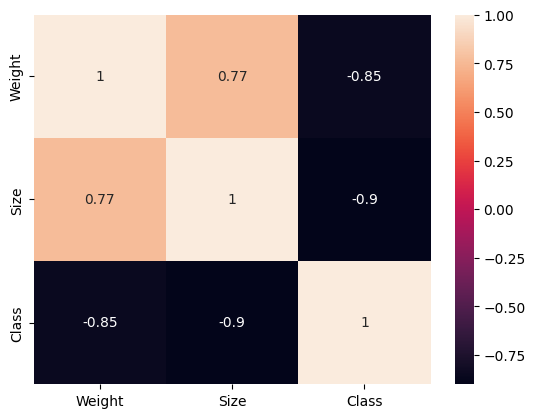

In [62]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [63]:
x = df[['Size','Weight']]
y = df['Class']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [64]:
y_train.shape

(32,)

In [65]:
# Applying the model
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred = lor.predict(x_test)

In [67]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0])

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3, 0],
       [1, 4]])